# Мишен комплит

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 1\. Загрузка файла HR\.csv в pandas DataFrame:

In [2]:
# Загрузка
df = pd.read_csv('HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 2\. \*Рассчитайте основные статистики для переменных:\*

In [4]:
statistics = df.describe()
mode = df.mode().iloc[0] 
min_values = df.min()
max_values = df.max()

print("Основные статистики:\\n", statistics)
print("\\nМода:\\n", mode)
print("\\nМинимальные значения:\\n", min_values)
print("\\nМаксимальные значения:\\n", max_values)

Основные статистики:\n        satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              1

# 3\. \*\*Рассчитайте и визуализируйте корреляционную матрицу:\*\*

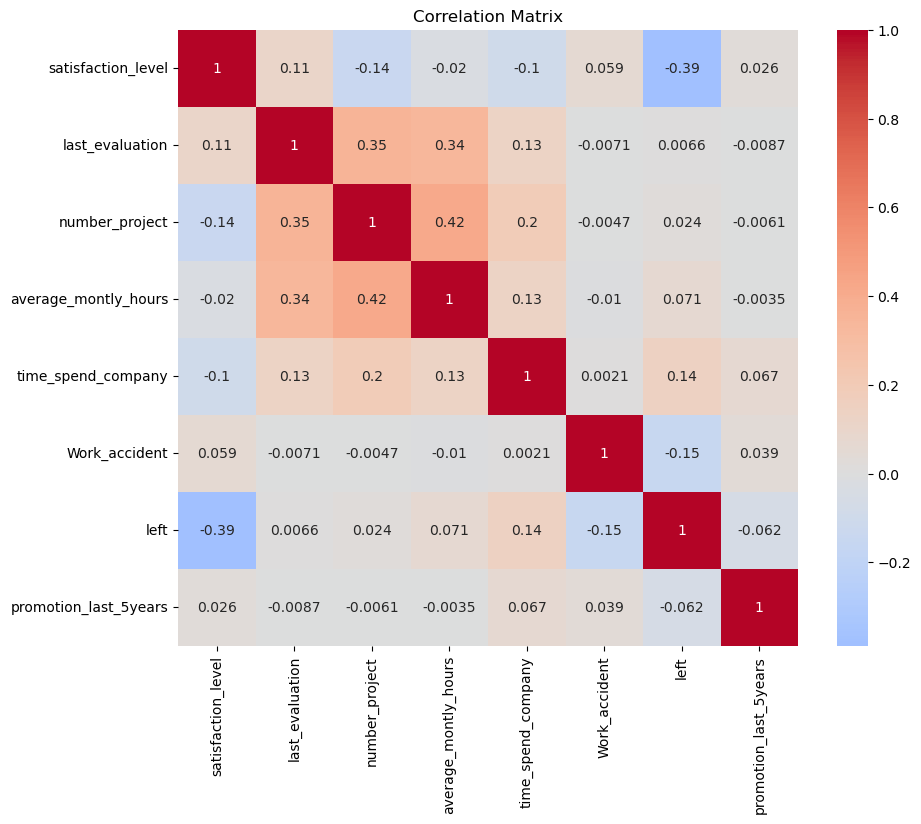

In [5]:
# Корреляционная матрица
corr_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Две самые скоррелированные и две наименее скоррелированные переменные
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
high_corr = corr_pairs[corr_pairs != 1].tail(2)
low_corr = corr_pairs[corr_pairs != 1].head(2)

print("Две самые скоррелированные переменные:\\n", high_corr)
print("Две наименее скоррелированные переменные:\\n", low_corr)

Две самые скоррелированные переменные:\n last_evaluation       number_project    0.349333
average_montly_hours  number_project    0.417211
dtype: float64
Две наименее скоррелированные переменные:\n left  satisfaction_level   -0.388375
      Work_accident        -0.154622
dtype: float64


# 4\. Рассчитайте сколько сотрудников работает в каждом департаменте:

In [7]:
department_counts = df['department'].value_counts()
print("Количество сотрудников в каждом департаменте:\\n", department_counts)

Количество сотрудников в каждом департаменте:\n sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


# 5\. Показать распределение сотрудников по зарплатам:

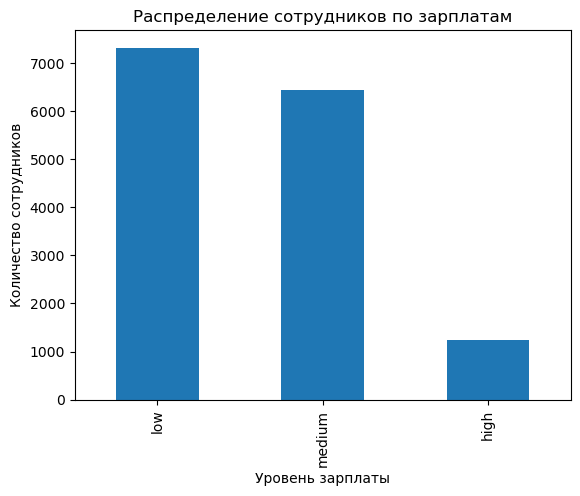

In [9]:
 salary_distribution = df['salary'].value_counts()
salary_distribution.plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

# 6\. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности:

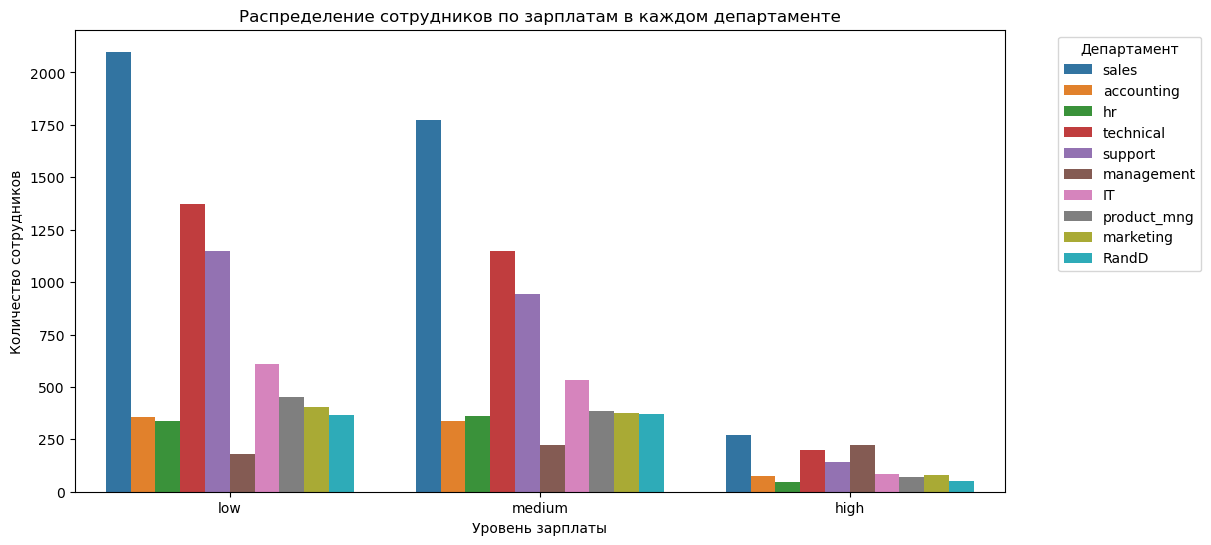

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='salary', hue='department', data=df)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.legend(title='Департамент', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7\. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени:

In [11]:
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

In [12]:
t_stat, p_value = ttest_ind(high_salary_hours, low_salary_hours)
print(f"T-статистика: {t_stat}, p-значение: {p_value}")

T-статистика: -0.7288680398062308, p-значение: 0.4661023478267259


In [13]:
if p_value < 0.05:
    print("Гипотеза подтверждена: сотрудники с высоким окладом проводят на работе больше времени.")
else:
    print("Гипотеза не подтверждена.")

Гипотеза не подтверждена.


# 8\. Рассчитать показатели среди уволившихся и не уволившихся сотрудников:

In [14]:
left_group = df[df['left'] == 1]
not_left_group = df[df['left'] == 0]

In [15]:
# Доля сотрудников с повышением за последние 5 лет
promotion_left = left_group['promotion_last_5years'].mean()
promotion_not_left = not_left_group['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
satisfaction_left = left_group['satisfaction_level'].mean()
satisfaction_not_left = not_left_group['satisfaction_level'].mean()

# Время на работе
hours_left = left_group['average_montly_hours'].mean()
hours_not_left = not_left_group['average_montly_hours'].mean()

In [16]:
print("Показатели среди уволившихся сотрудников:")
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_left}")
print(f"Удовлетворенность работой: {satisfaction_left}")
print(f"Среднее время на работе: {hours_left}")

print("\\nПоказатели среди не уволившихся сотрудников:")
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_not_left}")
print(f"Удовлетворенность работой: {satisfaction_not_left}")
print(f"Среднее время на работе: {hours_not_left}")

Показатели среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Удовлетворенность работой: 0.44009801176140917
Среднее время на работе: 207.41921030523662
\nПоказатели среди не уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Удовлетворенность работой: 0.666809590479516
Среднее время на работе: 199.0602030101505


# 9\. Разделить данные на тестовую и обучающую выборки и построить модель LDA:

In [17]:
# Убираем столбцы 'department' и 'salary'
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

In [18]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [21]:
# Предсказание на тестовой выборке
y_pred = lda.predict(X_test_scaled)

In [22]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели LDA: {accuracy}")

Точность модели LDA: 0.7557777777777778
